<a href="https://colab.research.google.com/github/KasunAt/CapstoneProject/blob/main/Capstone_Project_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT - MACHINE LEARNING FOUNDATION - JAN 2022**

# **Dataset: Car Insurance Data**
Reference: Car insurence dataset - Owner: Sagnik Roy - https://www.kaggle.com/datasets/sagnik1511/car-insurance-data?resource=download

1. import python modules

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

2. Load dataset

In [278]:
file_path= 'https://raw.githubusercontent.com/KasunAt/CapstoneProject/main/Car_Insurance_Claim.csv'

# Load CSV File
data = pd.read_csv(file_path)

3. Data Pre-procession pipeline

In [279]:
# Visualize the data set
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
1810,262122,65+,female,majority,20-29y,none,upper class,0.388329,1.0,before 2015,0.0,1.0,10238,10000.0,sedan,1,0,1,0.0
1698,38261,65+,male,majority,20-29y,high school,middle class,0.430825,1.0,after 2015,1.0,1.0,32765,5000.0,sedan,9,2,0,0.0
2253,845185,16-25,male,majority,0-9y,university,middle class,0.406106,1.0,before 2015,0.0,1.0,10238,10000.0,sedan,0,0,0,0.0
9244,38798,40-64,female,majority,10-19y,high school,middle class,0.574637,1.0,before 2015,0.0,1.0,10238,NaN,sedan,2,0,1,0.0
5269,548365,26-39,male,majority,10-19y,university,middle class,0.436731,0.0,before 2015,0.0,1.0,10238,15000.0,sedan,0,0,1,0.0


In [280]:
# Check the size of the data set
rows =  data.shape[0]
columns =  data.shape[1]
print(F"rows = {rows}, columns={columns}")

rows = 10000, columns=19


In [192]:
# Check and understand data types
data.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

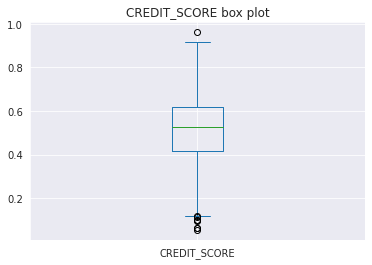

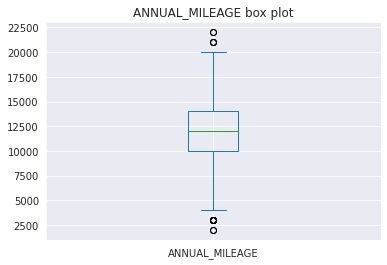

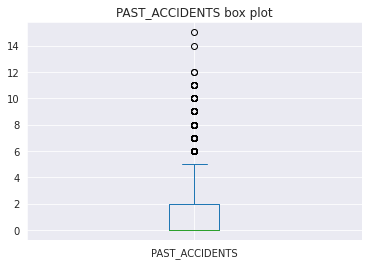

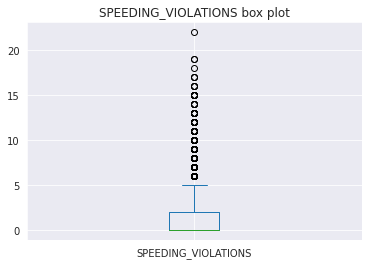

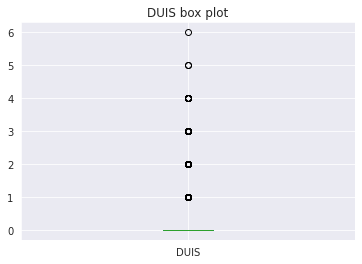

In [281]:
# Check for outliers in numerical columns [CREDIT_SCORE, ANNUAL_MILEAGE, PAST_ACCIDENTS, SPEEDING_VIOLATIONS, DUIS]

data['CREDIT_SCORE'].plot(kind='box', title='CREDIT_SCORE box plot')
plt.show()
data['ANNUAL_MILEAGE'].plot(kind='box', title='ANNUAL_MILEAGE box plot')
plt.show()
data['PAST_ACCIDENTS'].plot(kind='box', title='PAST_ACCIDENTS box plot')
plt.show()
data['SPEEDING_VIOLATIONS'].plot(kind='box', title='SPEEDING_VIOLATIONS box plot')
plt.show()
data['DUIS'].plot(kind='box', title='DUIS box plot')
plt.show()

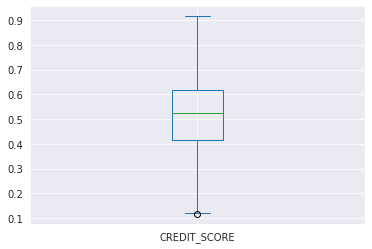

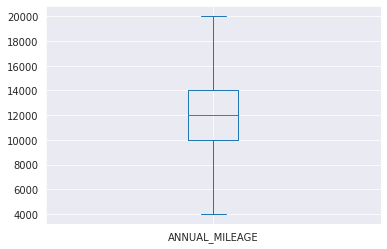

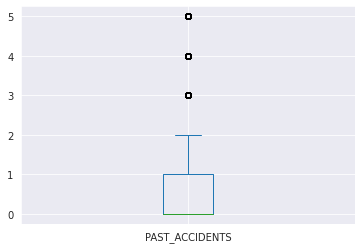

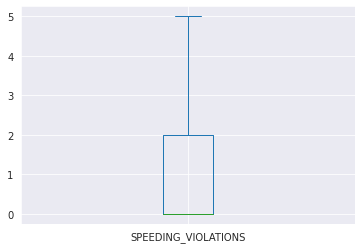

In [282]:
# Remove outliers
q1 = data['CREDIT_SCORE'].quantile(q=0.25)
q3 = data['CREDIT_SCORE'].quantile(q=0.75)
lower_bound = q1 - 1.5*(q3-q1)
upper_bound = q3 + 1.5*(q3-q1)
data.drop(data[data['CREDIT_SCORE'] < lower_bound].index, inplace = True)
data.drop(data[data['CREDIT_SCORE'] > upper_bound].index, inplace = True)
data['CREDIT_SCORE'].plot(kind='box')
plt.show()

q1 = data['ANNUAL_MILEAGE'].quantile(q=0.25)
q3 = data['ANNUAL_MILEAGE'].quantile(q=0.75)
lower_bound = q1 - 1.5*(q3-q1)
upper_bound = q3 + 1.5*(q3-q1)
data.drop(data[data['ANNUAL_MILEAGE'] < lower_bound].index, inplace = True)
data.drop(data[data['ANNUAL_MILEAGE'] > upper_bound].index, inplace = True)
data['ANNUAL_MILEAGE'].plot(kind='box')
plt.show()

q1 = data['PAST_ACCIDENTS'].quantile(q=0.25)
q3 = data['PAST_ACCIDENTS'].quantile(q=0.75)
lower_bound = q1 - 1.5*(q3-q1)
upper_bound = q3 + 1.5*(q3-q1)
data.drop(data[data['PAST_ACCIDENTS'] < lower_bound].index, inplace = True)
data.drop(data[data['PAST_ACCIDENTS'] > upper_bound].index, inplace = True)
data['PAST_ACCIDENTS'].plot(kind='box')
plt.show()

q1 = data['SPEEDING_VIOLATIONS'].quantile(q=0.25)
q3 = data['SPEEDING_VIOLATIONS'].quantile(q=0.75)
lower_bound = q1 - 1.5*(q3-q1)
upper_bound = q3 + 1.5*(q3-q1)
data.drop(data[data['SPEEDING_VIOLATIONS'] < lower_bound].index, inplace = True)
data.drop(data[data['SPEEDING_VIOLATIONS'] > upper_bound].index, inplace = True)
data['SPEEDING_VIOLATIONS'].plot(kind='box')
plt.show()


In [283]:
# Check remaining row count

data.shape

(9171, 19)

In [284]:
# Check for missing values
data.isnull().any()


ID                     False
AGE                    False
GENDER                 False
RACE                   False
DRIVING_EXPERIENCE     False
EDUCATION              False
INCOME                 False
CREDIT_SCORE            True
VEHICLE_OWNERSHIP      False
VEHICLE_YEAR           False
MARRIED                False
CHILDREN               False
POSTAL_CODE            False
ANNUAL_MILEAGE          True
VEHICLE_TYPE           False
SPEEDING_VIOLATIONS    False
DUIS                   False
PAST_ACCIDENTS         False
OUTCOME                False
dtype: bool

In [285]:
# Remove rows with missing values
data.dropna(how='any', axis=0, inplace=True)
data.isnull().any()

ID                     False
AGE                    False
GENDER                 False
RACE                   False
DRIVING_EXPERIENCE     False
EDUCATION              False
INCOME                 False
CREDIT_SCORE           False
VEHICLE_OWNERSHIP      False
VEHICLE_YEAR           False
MARRIED                False
CHILDREN               False
POSTAL_CODE            False
ANNUAL_MILEAGE         False
VEHICLE_TYPE           False
SPEEDING_VIOLATIONS    False
DUIS                   False
PAST_ACCIDENTS         False
OUTCOME                False
dtype: bool

In [286]:
# verify remaining row count

data.shape


(7464, 19)

In [287]:
# Check for bias in the data set
data['OUTCOME'].value_counts()

0.0    4982
1.0    2482
Name: OUTCOME, dtype: int64

Encoding

In [288]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [289]:
# Verify relevance of feature
data.groupby(by='AGE')['OUTCOME'].value_counts()

AGE    OUTCOME
16-25  1.0        1151
       0.0         461
26-39  0.0        1612
       1.0         820
40-64  0.0        1808
       1.0         357
65+    0.0        1101
       1.0         154
Name: OUTCOME, dtype: int64

In [290]:
AG = {'16-25' : 1, '26-39' : 2, '40-64' : 3, '65+' : 4}
data['AGE_NU'] = data['AGE'].replace(AG)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU
8413,497630,65+,female,majority,10-19y,university,upper class,0.616002,1.0,after 2015,0.0,1.0,32765,9000.0,sedan,0,0,0,0.0,4
6825,868625,40-64,female,majority,20-29y,university,upper class,0.666846,1.0,after 2015,1.0,1.0,32765,6000.0,sedan,4,0,0,0.0,3
5540,51377,40-64,female,majority,0-9y,none,upper class,0.446675,1.0,before 2015,1.0,1.0,32765,6000.0,sedan,0,0,0,1.0,3
4068,527884,65+,female,majority,30y+,high school,upper class,0.696348,1.0,before 2015,1.0,1.0,10238,10000.0,sedan,2,0,0,0.0,4
7659,639748,26-39,male,minority,10-19y,high school,working class,0.345590,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,2,0,0,0.0,2


In [291]:
# Verify relevance of feature
data.groupby(by='RACE')['OUTCOME'].value_counts()


RACE      OUTCOME
majority  0.0        4485
          1.0        2215
minority  0.0         497
          1.0         267
Name: OUTCOME, dtype: int64

In [292]:
#Race does not seem to impact outcome since the probability is same for majority and minority

In [293]:
data.groupby(by='GENDER')['OUTCOME'].value_counts()

GENDER  OUTCOME
female  0.0        2871
        1.0        1077
male    0.0        2111
        1.0        1405
Name: OUTCOME, dtype: int64

In [294]:
GE = {'male' : 1, 'female' : 2}
data['GENDER_NU'] = data['GENDER'].replace(GE)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU
2141,639474,26-39,male,majority,0-9y,high school,working class,0.402883,1.0,before 2015,...,1.0,10238,10000.0,sports car,0,0,0,1.0,2,1
5759,257171,26-39,female,majority,10-19y,university,working class,0.446344,1.0,before 2015,...,0.0,32765,12000.0,sedan,2,0,0,0.0,2,2
769,45019,26-39,female,majority,0-9y,university,middle class,0.671452,0.0,before 2015,...,1.0,92101,14000.0,sedan,0,0,0,0.0,2,2
4300,7002,16-25,male,majority,0-9y,university,working class,0.424700,1.0,before 2015,...,1.0,10238,16000.0,sedan,0,0,0,0.0,1,1
9402,884887,40-64,male,majority,20-29y,university,upper class,0.576128,1.0,before 2015,...,0.0,10238,20000.0,sedan,0,1,1,0.0,3,1


In [295]:
# Verify relevance of feature
data.groupby(by='DRIVING_EXPERIENCE')['OUTCOME'].value_counts()

DRIVING_EXPERIENCE  OUTCOME
0-9y                1.0        1786
                    0.0        1065
10-19y              0.0        1998
                    1.0         610
20-29y              0.0        1397
                    1.0          75
30y+                0.0         522
                    1.0          11
Name: OUTCOME, dtype: int64

In [296]:
DE = {'0-9y' : 1, '10-19y' : 2, '20-29y' : 3, '30y+' : 4}
data['DRIVING_EXPERIENCE_NU'] = data['DRIVING_EXPERIENCE'].replace(DE)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU
6023,842700,26-39,male,majority,0-9y,high school,middle class,0.388442,1.0,before 2015,...,21217,12000.0,sedan,0,0,0,1.0,2,1,1
1333,256276,40-64,female,majority,0-9y,none,middle class,0.490174,0.0,before 2015,...,32765,11000.0,sedan,0,0,0,1.0,3,2,1
9425,254132,16-25,female,majority,0-9y,none,poverty,0.299892,0.0,before 2015,...,10238,14000.0,sedan,0,0,0,1.0,1,2,1
1473,79370,26-39,male,majority,10-19y,none,working class,0.344814,1.0,before 2015,...,10238,14000.0,sedan,2,0,1,0.0,2,1,2
7480,259475,65+,male,majority,10-19y,high school,middle class,0.460290,1.0,before 2015,...,10238,10000.0,sedan,0,2,4,0.0,4,1,2


In [297]:
# Verify relevance of feature
data.groupby(by='EDUCATION')['OUTCOME'].value_counts()

EDUCATION    OUTCOME
high school  0.0        2053
             1.0        1083
none         0.0         763
             1.0         695
university   0.0        2166
             1.0         704
Name: OUTCOME, dtype: int64

In [298]:
ED = {'none' : 1, 'high school' : 2, 'university' : 3}
data['EDUCATION_NU'] = data['EDUCATION'].replace(ED)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU,EDUCATION_NU
6640,348902,26-39,female,majority,10-19y,high school,upper class,0.679680,1.0,before 2015,...,8000.0,sedan,1,1,0,0.0,2,2,2,2
4424,690509,65+,female,majority,30y+,high school,upper class,0.481507,1.0,after 2015,...,11000.0,sedan,3,0,4,0.0,4,2,4,2
5221,923637,40-64,male,minority,0-9y,university,upper class,0.758217,1.0,after 2015,...,12000.0,sedan,0,0,0,0.0,3,1,1,3
6738,773704,16-25,female,majority,0-9y,high school,poverty,0.367128,0.0,before 2015,...,15000.0,sedan,0,0,0,1.0,1,2,1,2
8626,12797,16-25,female,majority,0-9y,high school,working class,0.470818,1.0,before 2015,...,13000.0,sedan,0,0,0,0.0,1,2,1,2


In [299]:
# Verify relevance of feature
data.groupby(by='INCOME')['OUTCOME'].value_counts()

INCOME         OUTCOME
middle class   0.0        1146
               1.0         470
poverty        1.0         928
               0.0         502
upper class    0.0        2623
               1.0         461
working class  0.0         711
               1.0         623
Name: OUTCOME, dtype: int64

In [300]:
IC = {'poverty' : 1, 'working class' : 2, 'middle class' : 3, 'upper class' : 4}
data['INCOME_NU'] = data['INCOME'].replace(IC)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU,EDUCATION_NU,INCOME_NU
1512,928771,65+,female,majority,30y+,high school,upper class,0.654272,1.0,after 2015,...,sedan,2,0,1,0.0,4,2,4,2,4
5997,582033,26-39,female,minority,0-9y,none,middle class,0.505456,1.0,after 2015,...,sedan,0,0,0,0.0,2,2,1,1,3
5062,990555,40-64,male,majority,20-29y,high school,upper class,0.573489,1.0,after 2015,...,sedan,3,0,1,0.0,3,1,3,2,4
9640,891874,16-25,male,majority,0-9y,none,poverty,0.140983,0.0,before 2015,...,sedan,0,0,0,1.0,1,1,1,1,1
1300,292035,26-39,female,majority,0-9y,university,working class,0.387867,1.0,before 2015,...,sedan,0,0,0,0.0,2,2,1,3,2


In [301]:
# Verify relevance of feature
data.groupby(by='VEHICLE_YEAR')['OUTCOME'].value_counts()

VEHICLE_YEAR  OUTCOME
after 2015    0.0        1942
              1.0         273
before 2015   0.0        3040
              1.0        2209
Name: OUTCOME, dtype: int64

In [302]:
VE = {'before 2015' : 1, 'after 2015' : 2}
data['VEHICLE_YEAR_NU'] = data['VEHICLE_YEAR'].replace(VE)
data.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU,EDUCATION_NU,INCOME_NU,VEHICLE_YEAR_NU
3767,613989,26-39,male,majority,10-19y,high school,middle class,0.464676,0.0,after 2015,...,1,1,1,1.0,2,1,2,2,3,2
7959,290427,16-25,female,majority,0-9y,none,middle class,0.447405,1.0,before 2015,...,0,0,0,0.0,1,2,1,1,3,1
2610,866608,16-25,male,majority,0-9y,high school,poverty,0.192159,1.0,after 2015,...,0,0,0,0.0,1,1,1,2,1,2
8515,18850,26-39,female,minority,10-19y,high school,poverty,0.175240,0.0,before 2015,...,1,0,0,0.0,2,2,2,2,1,1
262,182095,40-64,male,majority,20-29y,university,middle class,0.581499,1.0,before 2015,...,5,0,0,0.0,3,1,3,3,3,1


In [303]:
# Verify relevance of feature
data.groupby(by='VEHICLE_TYPE')['OUTCOME'].value_counts()

VEHICLE_TYPE  OUTCOME
sedan         0.0        4745
              1.0        2360
sports car    0.0         237
              1.0         122
Name: OUTCOME, dtype: int64

In [304]:
# Create correlation matrix to select features
correlation_matrix = data[['AGE_NU', 'GENDER_NU', 'DRIVING_EXPERIENCE_NU', 'EDUCATION_NU', 'INCOME_NU', 'CREDIT_SCORE',	'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR_NU', 'SPEEDING_VIOLATIONS',	'DUIS',	'PAST_ACCIDENTS',	'OUTCOME']].corr()
correlation_matrix

,AGE_NU,GENDER_NU,DRIVING_EXPERIENCE_NU,EDUCATION_NU,INCOME_NU,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR_NU,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
AGE_NU,1.000000,0.045360,0.664544,0.252384,0.642503,0.500761,0.260114,0.225273,0.431791,0.250993,0.386912,-0.425696
GENDER_NU,0.045360,1.000000,0.069500,-0.070543,0.000957,0.102022,-0.004321,0.001410,-0.118344,-0.059256,-0.177330,-0.134353
DRIVING_EXPERIENCE_NU,0.664544,0.069500,1.000000,0.157628,0.425745,0.337624,0.191023,0.146442,0.642529,0.377963,0.584786,-0.485159
EDUCATION_NU,0.252384,-0.070543,0.157628,1.000000,0.568362,0.420996,0.234499,0.200781,0.113619,0.080336,0.107717,-0.177555
INCOME_NU,0.642503,0.000957,0.425745,0.568362,1.000000,0.751798,0.419470,0.352514,0.295761,0.174682,0.271410,-0.405662
CREDIT_SCORE,0.500761,0.102022,0.337624,0.420996,0.751798,1.000000,0.316279,0.269225,0.220677,0.121206,0.181163,-0.320939
VEHICLE_OWNERSHIP,0.260114,-0.004321,0.191023,0.234499,0.419470,0.316279,1.000000,0.149968,0.135465,0.082071,0.108919,-0.389400
VEHICLE_YEAR_NU,0.225273,0.001410,0.146442,0.200781,0.352514,0.269225,0.149968,1.000000,0.094988,0.039509,0.067344,-0.288565
SPEEDING_VIOLATIONS,0.431791,-0.118344,0.642529,0.113619,0.295761,0.220677,0.135465,0.094988,1.000000,0.316364,0.447160,-0.314290
DUIS,0.250993,-0.059256,0.377963,0.080336,0.174682,0.121206,0.082071,0.039509,0.316364,1.000000,0.246093,-0.185820


In [305]:
# All the features have above 13% correlation to outcome
# Therefore Backward Elimination is used through multiple iterations dropping 1 feature at a time
# total features ['AGE_NU', 'GENDER_NU', 'DRIVING_EXPERIENCE_NU', 'EDUCATION_NU', 'INCOME_NU', 'CREDIT_SCORE',	'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR_NU', 'SPEEDING_VIOLATIONS',	'DUIS',	'PAST_ACCIDENTS']
X_variables = ['AGE_NU', 'GENDER_NU', 'DRIVING_EXPERIENCE_NU', 'INCOME_NU', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR_NU', 'DUIS', 'PAST_ACCIDENTS']
y_variable = 'OUTCOME'

X = data[X_variables]
y = data[y_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train size:", X_train.shape[0])
print("X_test size:", X_test.shape[0])

X_train size: 5224
X_test size: 2240


Logistic regression model

In [306]:
model1 = LogisticRegression()

model1.fit(X_train, y_train)

y1_pred = model1.predict(X_test)
y1_pred_prob = model1.predict_proba(X_test)[:, 1]

result1 = pd.DataFrame({'y_act':y_test, 'y1_pred':y1_pred, 'y1_pred_prob':y1_pred_prob})
result1.sample(10)

,y_act,y1_pred,y1_pred_prob
5754,1.0,0.0,0.480512
7620,0.0,0.0,0.007159
7807,1.0,0.0,0.366525
8957,0.0,0.0,0.025651
3466,1.0,1.0,0.702923
3336,1.0,1.0,0.749259
510,1.0,0.0,0.332098
4270,1.0,1.0,0.517136
4698,0.0,0.0,0.159621
5580,0.0,0.0,0.007097


In [307]:
from sklearn.metrics import confusion_matrix
cf_matrix1 = confusion_matrix(result1['y_act'], result1['y1_pred'])

print(cf_matrix1)

[[1323  138]
 [ 222  557]]


In [308]:
acuracy_LRG = metrics.accuracy_score(result1['y_act'], result1['y1_pred']) 
acuracy_LRG

0.8392857142857143

In [309]:
precision_LRG = metrics.precision_score(result1['y_act'], result1['y1_pred'], average='binary', pos_label=1)
precision_LRG

0.8014388489208633

In [310]:
f1_score_LRG = metrics.f1_score(result1['y_act'], result1['y1_pred'], average='weighted') 
f1_score_LRG

0.8369518474197177

Decision Tree Classifier

In [311]:
model2 = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=2)

model2.fit(X_train, y_train)

y2_pred = model2.predict(X_test)
y2_pred_prob = model1.predict_proba(X_test)[:, 1]

result2 = pd.DataFrame({'y_act':y_test, 'y2_pred':y2_pred, 'y2_pred_prob':y2_pred_prob})
result2.sample(10)

,y_act,y2_pred,y2_pred_prob
2904,0.0,0.0,0.032870
5578,1.0,1.0,0.710099
7951,1.0,1.0,0.616916
1810,0.0,0.0,0.022779
8741,1.0,0.0,0.265998
8005,1.0,1.0,0.925882
9538,1.0,0.0,0.518419
6958,0.0,0.0,0.021867
8981,1.0,1.0,0.255571
5645,0.0,0.0,0.163247


In [316]:
cf_matrix2 = confusion_matrix(result2['y_act'], result2['y2_pred'])

print(cf_matrix2)

[[1305  156]
 [ 282  497]]


In [317]:
acuracy_DTC = metrics.accuracy_score(result2['y_act'], result2['y2_pred']) 
acuracy_DTC

0.8044642857142857

In [318]:
precision_DTC = metrics.precision_score(result2['y_act'], result2['y2_pred'], average='binary', pos_label=1)
precision_DTC

0.7611026033690659

In [319]:
f1_score_DTC = metrics.f1_score(result2['y_act'], result2['y2_pred'], average='weighted') 
f1_score_DTC

0.7999033913096757

Randomforrest classifier

In [320]:
model3 = RandomForestClassifier(random_state=0, max_depth=10, min_samples_split=2)

model3.fit(X_train, y_train)

y3_pred = model3.predict(X_test)
y3_pred_prob = model3.predict_proba(X_test)[:, 1]

result3 = pd.DataFrame({'y_act':y_test, 'y3_pred':y3_pred, 'y3_pred_prob':y3_pred_prob})
result3.sample(10)

,y_act,y3_pred,y3_pred_prob
807,1.0,1.0,0.803163
8669,0.0,0.0,0.065000
9421,0.0,0.0,0.065040
7605,0.0,0.0,0.142894
6257,0.0,0.0,0.189972
760,1.0,1.0,0.972558
6764,0.0,0.0,0.043724
5582,1.0,1.0,0.955185
4747,1.0,1.0,0.659721
3776,0.0,0.0,0.081469


In [321]:
cf_matrix3 = confusion_matrix(result3['y_act'], result3['y3_pred'])

print(cf_matrix3)

[[1307  154]
 [ 243  536]]


In [322]:
acuracy_RFC = metrics.accuracy_score(result3['y_act'], result3['y3_pred']) 
acuracy_RFC

0.8227678571428572

In [323]:
precision_RFC = metrics.precision_score(result3['y_act'], result3['y3_pred'], average='binary', pos_label=1)
precision_RFC

0.7768115942028986

In [324]:
f1_score_RFC = metrics.f1_score(result3['y_act'], result3['y3_pred'], average='weighted') 
f1_score_RFC

0.8200183533581834

Support vector machines

In [325]:
model4 = svm.SVC(kernel='linear', C=1.0, probability=True)

model4.fit(X_train, y_train)

y4_pred = model4.predict(X_test)
y4_pred_prob = model4.predict_proba(X_test)[:, 1]

result4 = pd.DataFrame({'y_act':y_test, 'y4_pred':y4_pred, 'y4_pred_prob':y4_pred_prob})
result4.sample(10)


,y_act,y4_pred,y4_pred_prob
6561,1.0,0.0,0.534638
5380,0.0,0.0,0.195947
6431,0.0,0.0,0.051163
8643,0.0,0.0,0.196043
7325,1.0,1.0,0.844138
5475,0.0,0.0,0.010995
3549,0.0,0.0,0.010983
7232,1.0,1.0,0.844330
8001,0.0,0.0,0.051238
3416,1.0,1.0,0.534717


In [326]:
cf_matrix4 = confusion_matrix(result4['y_act'], result4['y4_pred'])

print(cf_matrix4)

[[1289  172]
 [ 199  580]]


In [327]:
acuracy_SVM = metrics.accuracy_score(result4['y_act'], result4['y4_pred']) 
acuracy_SVM

0.834375

In [328]:
precision_SVM = metrics.precision_score(result4['y_act'], result4['y4_pred'], average='binary', pos_label=1)
precision_SVM

0.7712765957446809

In [329]:
f1_score_SVM = metrics.f1_score(result4['y_act'], result4['y4_pred'], average='weighted') 
f1_score_SVM

0.8336727594116305

Model comparison

In [330]:
# Created 4 models compared to select best model
metrics_comp = [['LRG', acuracy_LRG, precision_LRG, f1_score_LRG],
['DTC', acuracy_DTC, precision_DTC, f1_score_DTC],
['RFC', acuracy_RFC, precision_RFC, f1_score_RFC],
['SVM', acuracy_SVM, precision_SVM, f1_score_SVM]]

pd.DataFrame(data=metrics_comp, columns=['Model', 'accuracy', 'precision', 'f1_score'])

,Model,accuracy,precision,f1_score
0,LRG,0.839286,0.801439,0.836952
1,DTC,0.804464,0.761103,0.799903
2,RFC,0.822768,0.776812,0.820018
3,SVM,0.834375,0.771277,0.833673


In [331]:
# Linear Regression model gives the best result and is cloosen fo optimization

Model tunning

In [332]:
# Selecting linear regression model
result1['y1_pred_prob'].value_counts(bins=10)

(-0.0015270000000000001, 0.0935]    748
(0.0935, 0.187]                     338
(0.838, 0.931]                      225
(0.652, 0.745]                      197
(0.466, 0.559]                      174
(0.187, 0.28]                       156
(0.373, 0.466]                      135
(0.28, 0.373]                       102
(0.559, 0.652]                       95
(0.745, 0.838]                       70
Name: y1_pred_prob, dtype: int64

In [333]:
# Divide 10 buckets based on probability
result1['prob_bucket'] = pd.cut(result1['y1_pred_prob'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
result1['prob_bucket']

3219    (0.0, 0.1]
4581    (0.2, 0.3]
54      (0.4, 0.5]
4322    (0.0, 0.1]
7499    (0.0, 0.1]
           ...    
2473    (0.1, 0.2]
5687    (0.9, 1.0]
5401    (0.1, 0.2]
9975    (0.9, 1.0]
5882    (0.4, 0.5]
Name: prob_bucket, Length: 2240, dtype: category
Categories (10, interval[float64, right]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] < ... <
                                            (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [334]:
calibration_table  = result1.groupby(by='prob_bucket').agg(
    count=pd.NamedAgg(column="prob_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y1_pred_prob", aggfunc="min"),
    mean_probability = pd.NamedAgg(column="y1_pred_prob", aggfunc="mean"),
    ).reset_index()

calibration_table

,prob_bucket,count,response_count,min_probability,mean_probability
0,"(0.0, 0.1]",766,30.0,0.000404,0.029315
1,"(0.1, 0.2]",339,37.0,0.100055,0.144742
2,"(0.2, 0.3]",162,38.0,0.200166,0.253226
3,"(0.3, 0.4]",107,38.0,0.300905,0.344414
4,"(0.4, 0.5]",171,79.0,0.402898,0.455832
5,"(0.5, 0.6]",136,90.0,0.500039,0.532612
6,"(0.6, 0.7]",190,146.0,0.600806,0.660313
7,"(0.7, 0.8]",91,66.0,0.700535,0.728310
8,"(0.8, 0.9]",142,125.0,0.802821,0.840180
9,"(0.9, 1.0]",136,130.0,0.901678,0.924466


In [335]:
calibration_table['precision'] = calibration_table['response_count'] / calibration_table['count'] 
calibration_table['response_fraction'] = calibration_table['response_count'] / calibration_table['response_count'].sum()
calibration_table

,prob_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
0,"(0.0, 0.1]",766,30.0,0.000404,0.029315,0.039164,0.038511
1,"(0.1, 0.2]",339,37.0,0.100055,0.144742,0.109145,0.047497
2,"(0.2, 0.3]",162,38.0,0.200166,0.253226,0.234568,0.048780
3,"(0.3, 0.4]",107,38.0,0.300905,0.344414,0.355140,0.048780
4,"(0.4, 0.5]",171,79.0,0.402898,0.455832,0.461988,0.101412
5,"(0.5, 0.6]",136,90.0,0.500039,0.532612,0.661765,0.115533
6,"(0.6, 0.7]",190,146.0,0.600806,0.660313,0.768421,0.187420
7,"(0.7, 0.8]",91,66.0,0.700535,0.728310,0.725275,0.084724
8,"(0.8, 0.9]",142,125.0,0.802821,0.840180,0.880282,0.160462
9,"(0.9, 1.0]",136,130.0,0.901678,0.924466,0.955882,0.166881


Feature Importance

In [348]:
importance=model1.coef_
importance_t = importance.reshape(9,)
importance_t

array([-0.11041556, -0.88974623, -1.45859365, -0.08141671,  0.08943669,
       -1.69935445, -1.52176836, -0.01939024, -0.27341256])

In [349]:
features = X_test.columns
features

Index(['AGE_NU', 'GENDER_NU', 'DRIVING_EXPERIENCE_NU', 'INCOME_NU',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR_NU', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')

In [350]:
feature_importance_table = pd.DataFrame(data={'features': features, 'feature_importances':importance_t})
feature_importance_table

,features,feature_importances
0,AGE_NU,-0.110416
1,GENDER_NU,-0.889746
2,DRIVING_EXPERIENCE_NU,-1.458594
3,INCOME_NU,-0.081417
4,CREDIT_SCORE,0.089437
5,VEHICLE_OWNERSHIP,-1.699354
6,VEHICLE_YEAR_NU,-1.521768
7,DUIS,-0.019390
8,PAST_ACCIDENTS,-0.273413
